In [1]:
# SPOTIFY GLOBAL MUSIC DATASET (2009-2025) - PROFESSIONAL EDA & ML PIPELINE
# Author: Jay Patel | Kaggle Master Journey

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("="*80)
print("SPOTIFY GLOBAL MUSIC DATASET ANALYSIS")
print("="*80)

# List available files
print("\n📁 Available Dataset Files:")
for dirname, _, filenames in os.walk('/kaggle/input/spotify-global-music-dataset-20092025'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        print(f"  • {filepath}")

# Load the main dataset
df = pd.read_csv('/kaggle/input/spotify-global-music-dataset-20092025/spotify_data clean.csv')
print(f"\n✅ Dataset loaded successfully!")
print(f"📊 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

SPOTIFY GLOBAL MUSIC DATASET ANALYSIS

📁 Available Dataset Files:
  • /kaggle/input/spotify-global-music-dataset-20092025/track_data_final.csv
  • /kaggle/input/spotify-global-music-dataset-20092025/spotify_data clean.csv

✅ Dataset loaded successfully!
📊 Shape: 8,582 rows × 15 columns


In [2]:
# STEP 2: DATA OVERVIEW

display(df.info())
display(df.describe())
display(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8582 non-null   object 
 1   track_name          8582 non-null   object 
 2   track_number        8582 non-null   int64  
 3   track_popularity    8582 non-null   int64  
 4   explicit            8582 non-null   bool   
 5   artist_name         8579 non-null   object 
 6   artist_popularity   8582 non-null   int64  
 7   artist_followers    8582 non-null   int64  
 8   artist_genres       5221 non-null   object 
 9   album_id            8582 non-null   object 
 10  album_name          8582 non-null   object 
 11  album_release_date  8582 non-null   object 
 12  album_total_tracks  8582 non-null   int64  
 13  album_type          8582 non-null   object 
 14  track_duration_min  8582 non-null   float64
dtypes: bool(1), float64(1), int64(5), object(8)
memory usag

None

,track_number,track_popularity,artist_popularity,artist_followers,album_total_tracks,track_duration_min
count,8582.000000,8582.000000,8582.000000,8.582000e+03,8582.000000,8582.000000
mean,5.772547,52.356211,69.730016,2.403472e+07,13.789443,3.492805
std,6.052792,23.816076,19.645979,3.803180e+07,11.887131,1.057970
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000,0.070000
25%,1.000000,39.000000,60.000000,4.623200e+05,6.000000,2.880000
50%,4.000000,58.000000,74.000000,6.105547e+06,13.000000,3.445000
75%,9.000000,71.000000,84.000000,2.725255e+07,17.000000,3.990000
max,102.000000,99.000000,100.000000,1.455421e+08,181.000000,13.510000


track_id                 0
track_name               0
track_number             0
track_popularity         0
explicit                 0
artist_name              3
artist_popularity        0
artist_followers         0
artist_genres         3361
album_id                 0
album_name               0
album_release_date       0
album_total_tracks       0
album_type               0
track_duration_min       0
dtype: int64

In [3]:
# STEP 3: DATA CLEANING

df = df.drop_duplicates()
df = df.fillna(method='ffill')
df.isnull().sum()


track_id              0
track_name            0
track_number          0
track_popularity      0
explicit              0
artist_name           0
artist_popularity     0
artist_followers      0
artist_genres         0
album_id              0
album_name            0
album_release_date    0
album_total_tracks    0
album_type            0
track_duration_min    0
dtype: int64

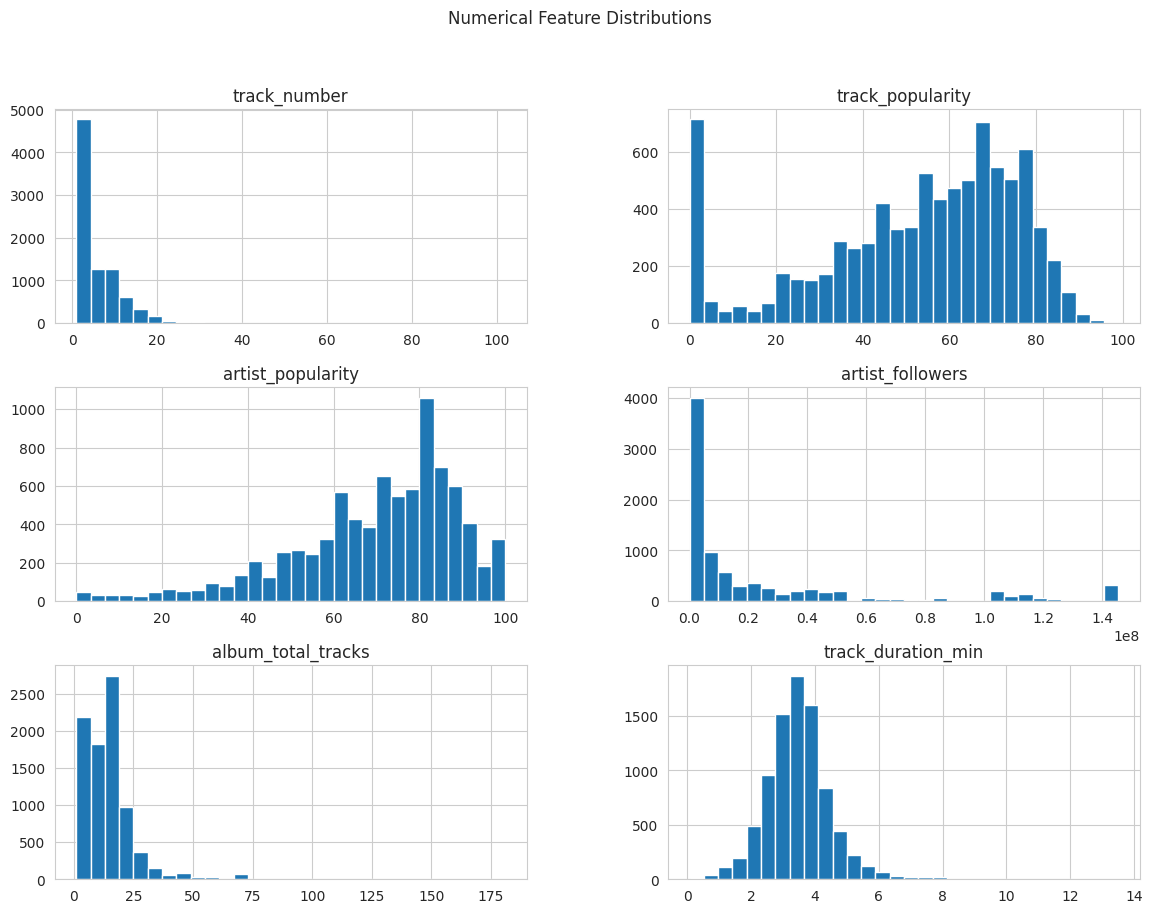

In [4]:
# STEP 4: QUICK DATA VISUALIZATION

df.hist(figsize=(14,10), bins=30)
plt.suptitle('Numerical Feature Distributions')
plt.show()

if 'popularity' in df.columns:
    sns.histplot(df['popularity'], kde=True)
    plt.title('Popularity Distribution')
    plt.show()


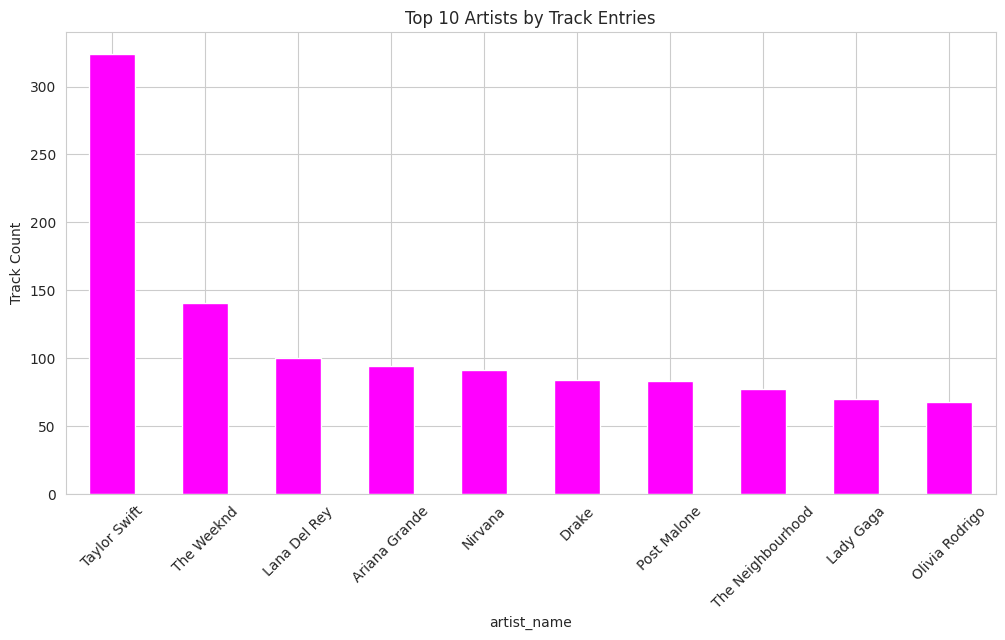

In [5]:
# STEP 5: TOP ARTISTS ANALYSIS

if 'artist_name' in df.columns:
    top_artists = df['artist_name'].value_counts().head(10)
    top_artists.plot(kind='bar', color='magenta')
    plt.title('Top 10 Artists by Track Entries')
    plt.ylabel('Track Count')
    plt.xticks(rotation=45)
    plt.show()

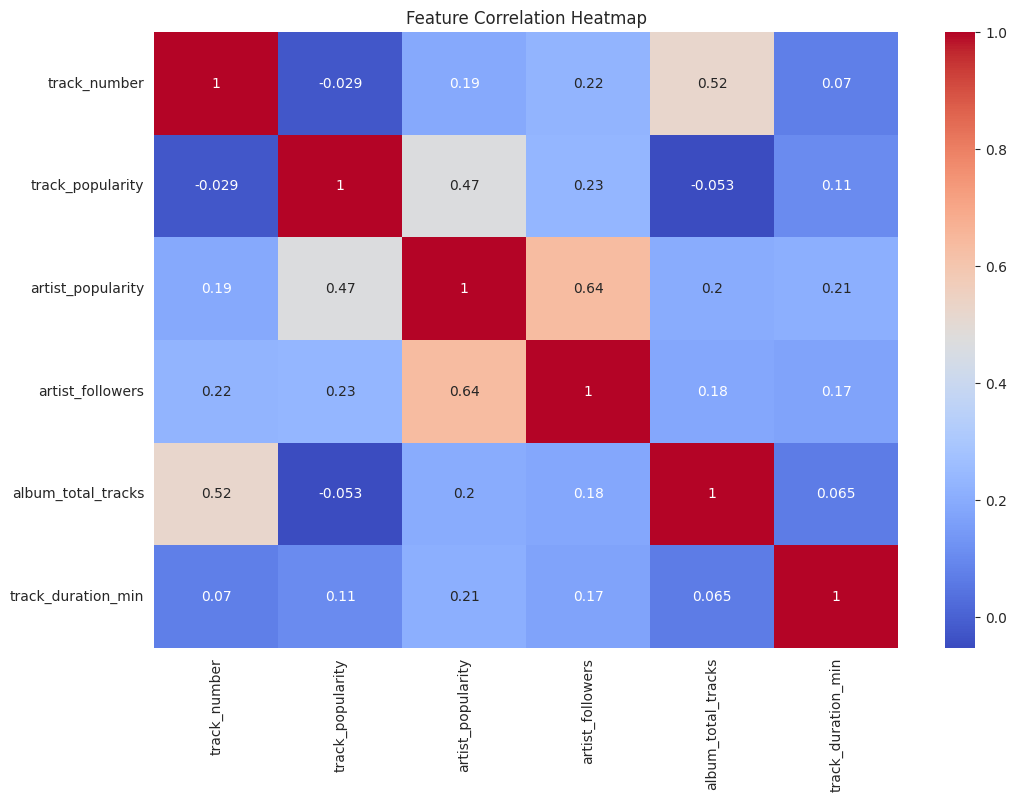

In [6]:
# STEP 6: CORRELATION ANALYSIS

plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [7]:
# STEP 7: YEARLY POPULARITY TREND (IF YEAR COLUMN EXISTS)

if 'year' in df.columns:
    df.groupby('year')['popularity'].mean().plot(marker='o', color='teal')
    plt.title("Mean Popularity Trend by Year")
    plt.ylabel("Popularity")
    plt.show()


In [8]:
# STEP 8: DATA PREPARATION FOR ML

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode artists for ML algorithms
if 'artist_name' in df.columns:
    le_artist = LabelEncoder()
    df['artist_encoded'] = le_artist.fit_transform(df['artist_name'])

features = ['track_popularity', 'artist_popularity', 'artist_followers']  # Adjust as per EDA
if 'artist_encoded' in df.columns:
    features.append('artist_encoded')

X = df[features]
y = df['track_popularity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (6865, 4)
Test set shape: (1717, 4)


In [9]:
# STEP 9: FIRST MACHINE LEARNING MODEL DEMO

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, y_pred))


Test MSE: 0.008897961560861978
